In [1]:
print(
"""
@Title: CHAPTER 3 Going on a random walk
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-11-28 19:51:47
@Description: 
"""
)


@Title: CHAPTER 3 Going on a random walk
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-11-28 19:51:47
@Description: 



In [2]:
from utils.funcs import simulate_process
from utils.ts_plot import simulate_process_plot
import matplotlib.pyplot as plt

In [3]:
ts = simulate_process(is_stationary=False, n=500)

<Axes: xlabel='Timesteps'>

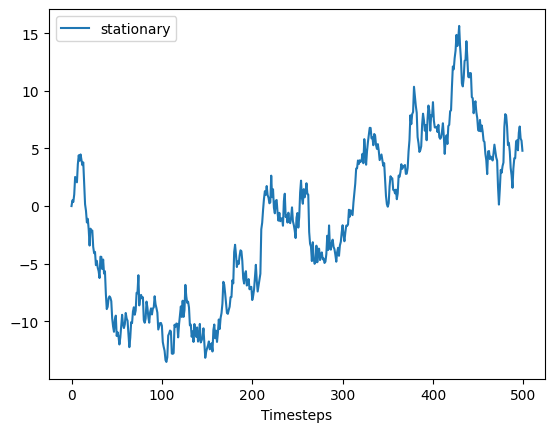

In [4]:
fig, ax = plt.subplots()
simulate_process_plot(ax, ts)

In [5]:
from statsmodels.tsa.stattools import adfuller
adfuller(ts)

(-1.4416066161676315,
 0.5621749658673371,
 0,
 499,
 {'1%': -3.4435228622952065,
  '5%': -2.867349510566146,
  '10%': -2.569864247011056},
 1348.9837794108853)

In [6]:
import numpy as np
diff_ts = np.diff(ts, n=1)

In [7]:
adfuller(diff_ts)

(-22.4058521344468,
 0.0,
 0,
 498,
 {'1%': -3.4435494520411605,
  '5%': -2.8673612117611267,
  '10%': -2.5698704830567247},
 1348.097148028226)

In [8]:
import pandas as pd
ts = pd.DataFrame({'value':ts})
train = ts[:400]
test = ts[400:].copy()

In [9]:
test.loc[:, ['pred_mean']] = train['value'].mean()
test.loc[:, ['pred_last']] = train.iloc[-1].value

delta_X = len(train) - 1
delta_Y = train.iloc[-1, 0] - train.iloc[0, 0]

drift = delta_Y / delta_X
x_vals = np.arange(400, 500, 1)

test.loc[:, ['pred_drift']] = drift * x_vals + train.iloc[0, 0]

from sklearn.metrics import mean_squared_error
mean_squared_error(test['value'], test.loc[:, ['pred_mean']])

125.5002713676527

In [10]:
mean_squared_error(test['value'], test.loc[:, ['pred_last']])

12.03277697842856

In [11]:
mean_squared_error(test['value'], test.loc[:, ['pred_drift']])

16.478221400850586

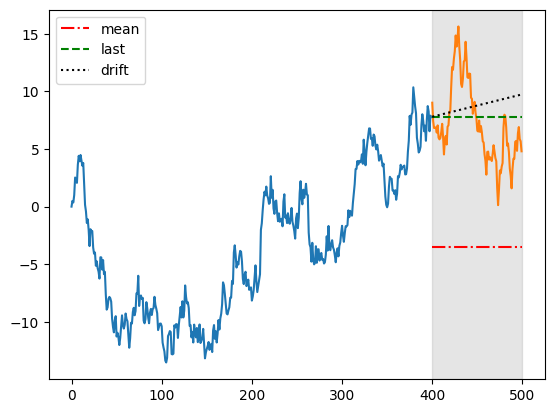

In [12]:
fig, ax = plt.subplots()
ax.plot(train['value'])
ax.plot(test['value'])
ax.plot(test['pred_mean'], 'r-.', label='mean')
ax.plot(test['pred_last'], 'g--', label='last')
ax.plot(test['pred_drift'], 'k:', label='drift')
ax.axvspan(len(train), len(test)+len(train), color='#808080', alpha=.2)
ax.legend()

In [13]:
ts_shift = ts.shift(periods=1)
mse_one_step = mean_squared_error(test['value'], ts_shift[400:])
mse_one_step

1.119544017729324

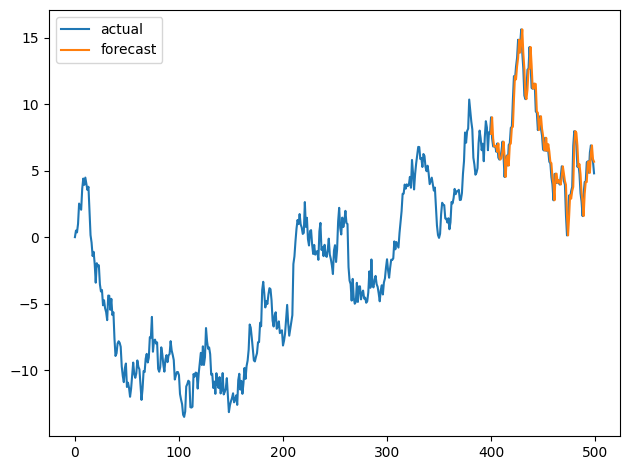

In [14]:
fig, ax = plt.subplots()

ax.plot(ts, label='actual')
ax.plot(ts_shift[400:], label='forecast')
ax.legend()
plt.tight_layout()

## Forecast the daily closing price of GOOGL

In [15]:
df = pd.read_csv('../data/GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


In [16]:
train = df[['Date', 'Close']][:-5]
test = df[['Date', 'Close']][-5:].copy()

In [17]:
test.loc[:, ['pred_mean']] = train['Close'].mean()
test.loc[:, ['pred_last']] = train['Close'].iloc[-1]

delta_X = len(train) - 1
delta_Y = train['Close'].iloc[-1] - train['Close'].iloc[0]
drift = delta_Y / delta_X

x_vals = np.arange(len(train), len(df), 1)
test.loc[:, 'pred_drift'] = drift * x_vals + train['Close'].iloc[0]

In [18]:
len(train)

248

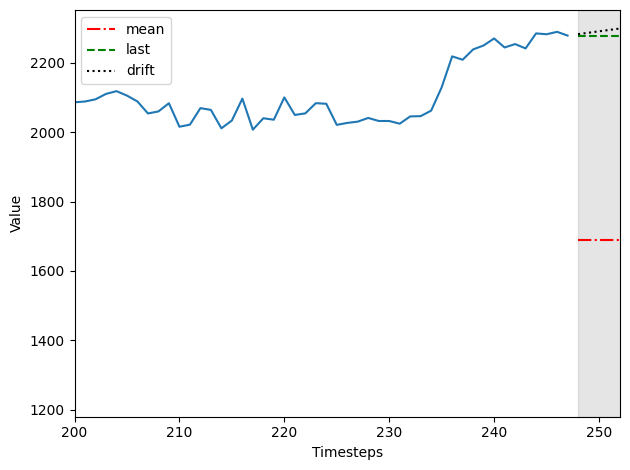

In [23]:
from utils.ts_plot import plot_pred
fig, ax = plot_pred(test)
ax.plot(train['Close'])
ax.axvspan(len(train), len(train) + len(test), color='#808080', alpha=.2)
plt.xlim(200, 252)
plt.tight_layout()

In [28]:
df_shift = df.shift(1)
mse_one_step = mean_squared_error(test['Close'], df_shift['Close'].iloc[len(train):])
mse_one_step

674.8857699967758

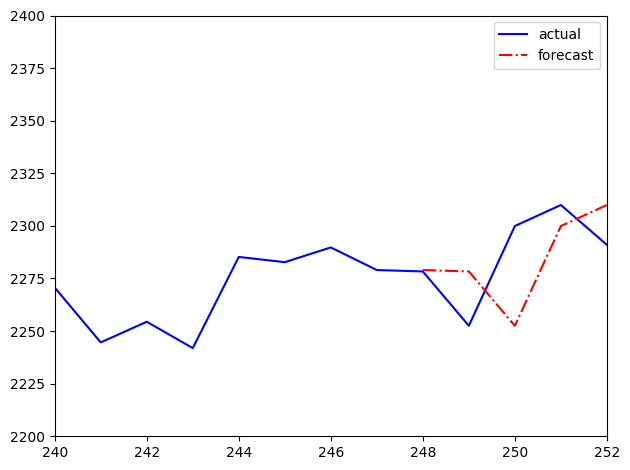

In [35]:
fig, ax = plt.subplots()
ax.plot(df['Close'], 'b-', label='actual')
ax.plot(df_shift['Close'].iloc[len(train):], 'r-.', label='forecast')
ax.legend()
plt.xlim(240, 252)
plt.ylim(2200, 2400)
plt.tight_layout()

## Forecast the daily closing price of a stock of your choice

In [40]:
import yfinance as yf
df = yf.download('603619.SS', start='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


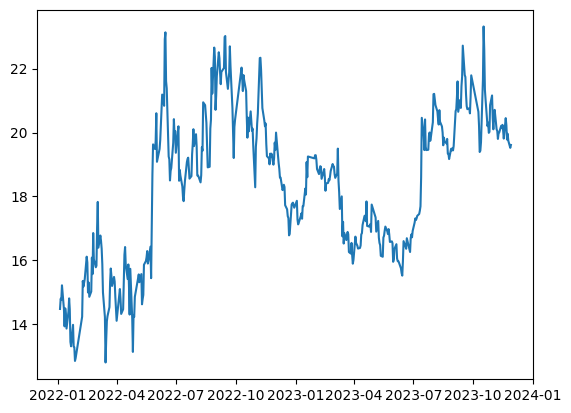

In [43]:
fig, ax = plt.subplots()
ax.plot(df['Adj Close'])

In [79]:
diff_close = np.diff(df['Adj Close'])
adfuller(diff_close)
# 是随机游走

(-11.577463471913852,
 2.9984999951841383e-21,
 5,
 454,
 {'1%': -3.444836032925901,
  '5%': -2.8679272692747415,
  '10%': -2.5701721745036776},
 770.5055390982786)

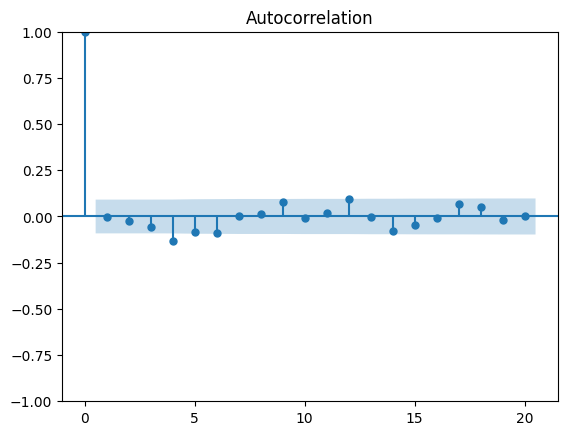

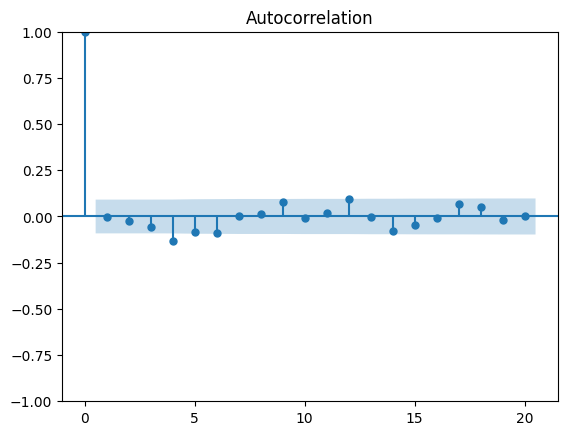

In [80]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff_close, lags=20)

In [60]:
train = df[['Adj Close']].iloc[:-5]
test = df[['Adj Close']].iloc[-5:].copy()

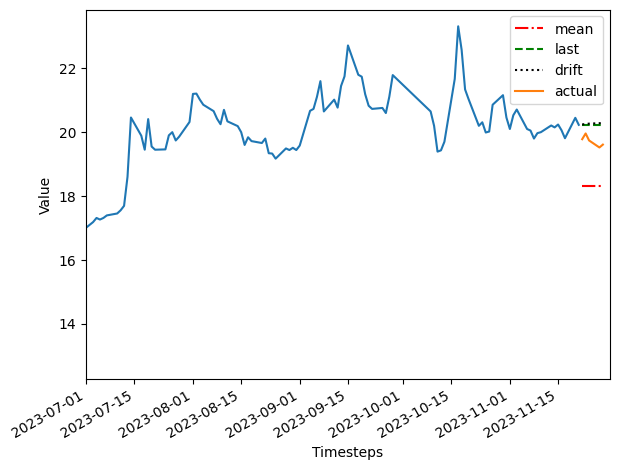

In [94]:
test.loc[:, 'pred_mean'] = train['Adj Close'].mean()
test.loc[:, 'pred_last'] = train['Adj Close'].iloc[-1]

delta_X = len(train) - 1
delta_Y = train['Adj Close'].iloc[-1] - train['Adj Close'].iloc[0]
drift = delta_Y / delta_X
x_vals = np.arange(len(train), len(train) + len(test), 1)
test.loc[:, 'pred_drift'] = x_vals * drift + train['Adj Close'].iloc[0]
import datetime

fig, ax = plot_pred(test)
ax.plot(train['Adj Close'])
ax.plot(test['Adj Close'], label='actual')
ax.legend()
ax.set_xlim(datetime.datetime(2023, 7, 1), datetime.datetime(2023, 11, 30))
fig.autofmt_xdate()

In [89]:
mean_squared_error(test['Adj Close'], test['pred_mean'])

1.9911064635966997

In [90]:
mean_squared_error(test['Adj Close'], test['pred_last'])

0.28079927368235075

In [95]:
mean_squared_error(test['Adj Close'], test['pred_drift'])

0.3250495669021944

In [100]:
df_shift = df['Adj Close'].shift()

mse_one_step = mean_squared_error(test['Adj Close'], df_shift.iloc[len(train):])
mse_one_step

0.06795956329442561

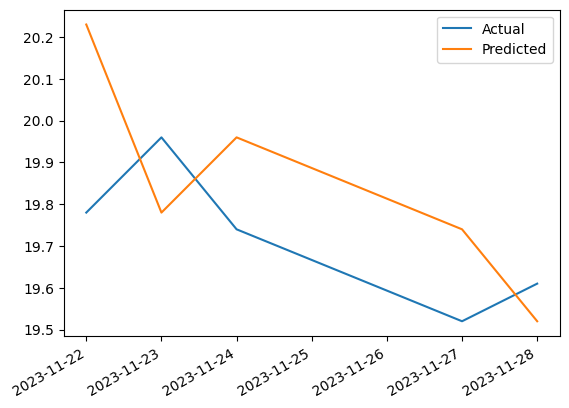

In [108]:
fig, ax = plt.subplots()
ax.plot(test['Adj Close'], label='Actual')
ax.plot(df_shift.iloc[len(train):], label='Predicted')
ax.legend()
fig.autofmt_xdate()